#Загрузка данных

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
!unzip /content/gdrive/My\ Drive/ml_data/realestatepriceprediction.zip

Archive:  /content/gdrive/My Drive/ml_data/realestatepriceprediction.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [3]:
train_dir = '/content/train.csv'
test_dir = '/content/test.csv'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('fivethirtyeight')

In [6]:
df = pd.read_csv(train_dir)

#Обработка

Data fields  
Id - идентификационный номер квартиры  
DistrictId - идентификационный номер района  
Rooms - количество комнат  
Square - площадь  
LifeSquare - жилая площадь  
KitchenSquare - площадь кухни  
Floor - этаж  
HouseFloor - количество этажей в доме  
HouseYear - год постройки дома  
Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности  
Social_1, Social_2, Social_3 - социальные показатели местности  
Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья  
Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров  
Price - цена квартиры  

In [7]:
df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808


In [8]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [10]:
df.Ecology_2.value_counts(), df.Ecology_3.value_counts(), df.Shops_2.value_counts()

(B    9903
 A      97
 Name: Ecology_2, dtype: int64, B    9725
 A     275
 Name: Ecology_3, dtype: int64, B    9175
 A     825
 Name: Shops_2, dtype: int64)

Ecology_2,	Ecology_3, Shops_2, 

In [11]:
def Ec_Shop_Distr_Tr(df):
    df.Ecology_2 = df.Ecology_2.astype('category')
    df.Ecology_2 = df.Ecology_2.cat.codes

    df.Ecology_3 = df.Ecology_3.astype('category')
    df.Ecology_3 = df.Ecology_3.cat.codes

    df.Shops_2 = df.Shops_2.astype('category')
    df.Shops_2 = df.Shops_2.cat.codes
    
    df.DistrictId = df.DistrictId.astype(str)
Ec_Shop_Distr_Tr(df)  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f91c06b00>,
      dtype=object)

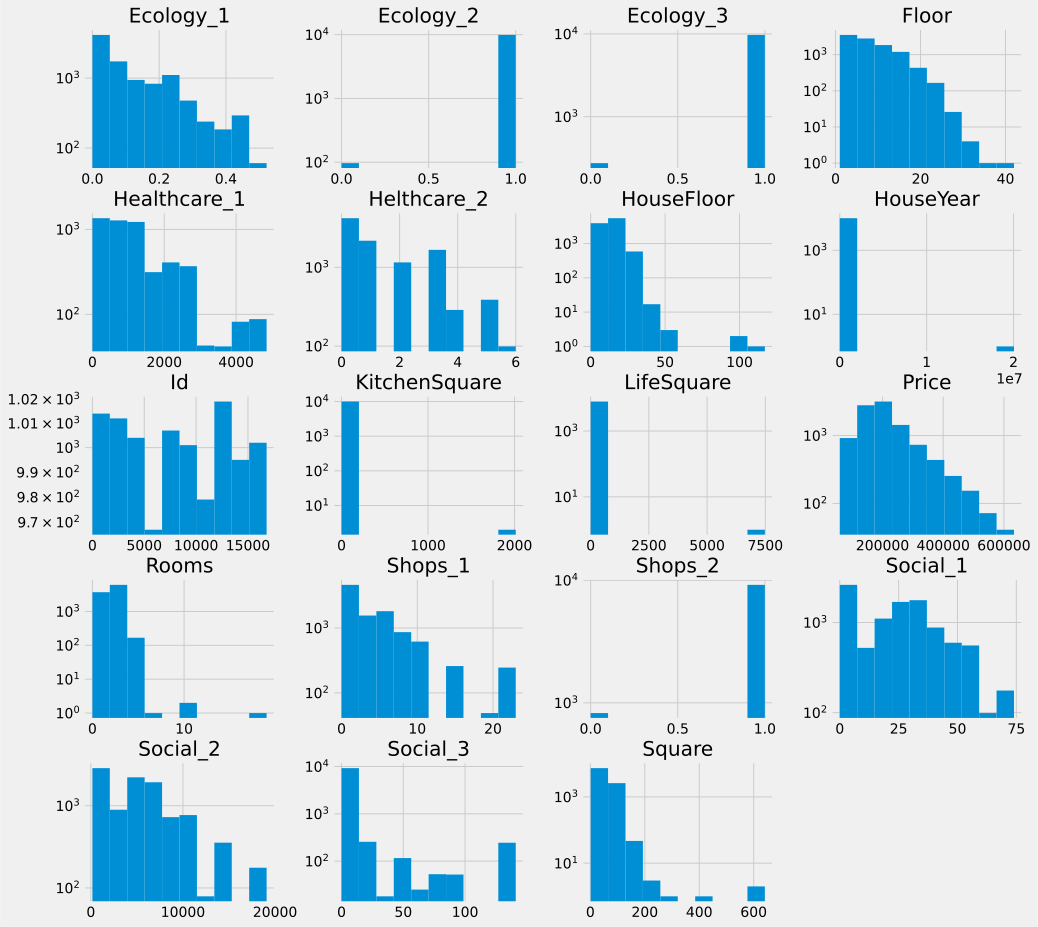

In [12]:
df.hist(df.columns, figsize=(15, 15), log=True)

Странности:  
Rooms =	0  
Square = 1.136859  
LifeSquare = 0.370619  
Square.max <	LifeSquare.max  
HouseFloor = 0 & HouseFloor < Floor   
HouseYear = 2.005201e+07	
Healthcare_1 много пропусков мб удалить, мб заполнить???  
LifeSquare пропуски

Heatmap

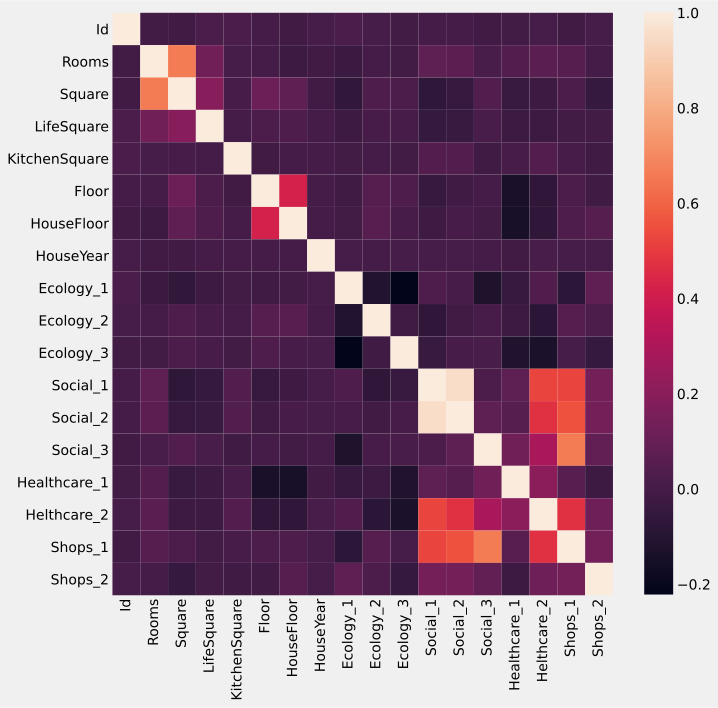

In [13]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.drop(labels='Price', axis=1).corr())
plt.show()

##Высокая корреляция между Social_1 Social_2

In [14]:
df.drop(labels='Social_2', axis=1, inplace=True)

##Healthcare_1

Методом научного тыка выяснилось, что лучше его удалить. Оценка получается выше

In [15]:
df.drop(labels='Healthcare_1', axis=1, inplace=True)

##Выбросы

In [16]:
def emis(df):
    df.Rooms[df.Rooms < 1] = np.nan
    df.Square[df.Square < 16] = np.nan
    df.LifeSquare[df.LifeSquare > df.Square] = np.nan
    df.HouseFloor[df.HouseFloor < df.Floor] = np.nan
    df.HouseYear[df.HouseYear > 2050] = np.nan
    imputer = IterativeImputer(max_iter=100)
    t = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    for i in df.isnull().sum()[df.isnull().sum()>0].keys():
      df[i][df[i].isnull()] = t[i][df[i].isnull()]
emis(df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

##Разбиваем данные

In [17]:
X = df.drop('Price', axis=1)
y = df['Price']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)

#Учись

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [21]:
RFR = RandomForestRegressor(n_estimators=1000, max_depth=100, n_jobs=-1)

In [22]:
RFR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [23]:
y_pred_RFR = RFR.predict(X_valid)
r2_score(y_valid, y_pred_RFR)

0.7318729315220045

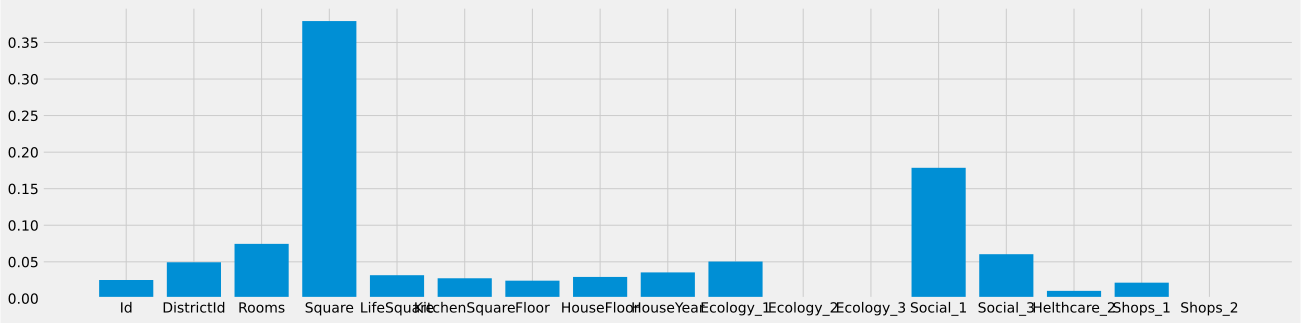

In [24]:
plt.figure(figsize=(20, 5))
plt.bar(X.columns, RFR.feature_importances_)
plt.show()

#Делай ответ

In [25]:
df_test = pd.read_csv(test_dir)

In [26]:
def pre_pro(df):
  Ec_Shop_Distr_Tr(df)
  df.drop(labels='Social_2', axis=1, inplace=True)
  df.drop(labels='Healthcare_1', axis=1, inplace=True)
  emis(df)
pre_pro(df_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [27]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   object 
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     5000 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   int8   
 11  Ecology_3      5000 non-null   int8   
 12  Social_1       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Helthcare_2    5000 non-null   int64  
 15  Shops_1        5000 non-null   int64  
 16  Shops_2        5000 non-null   int8   
dtypes: float64(6), int64(7), int8(3), object(1)
memory u

In [28]:
y_test_pred_RFR = RFR.predict(df_test)

In [29]:
sub_df = pd.DataFrame({'Id':df_test.Id,
                       'Price':y_test_pred_RFR})

In [30]:
sub_df.to_csv("/content/ans3.4.csv", index=False)